<a href="https://colab.research.google.com/github/leunco/Hands_On_MachineLearning/blob/main/3%EC%A3%BC%EC%B0%A8/%EA%B9%80%EB%8B%A4%EC%98%81/Chap8_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

## Chap8. 차원 축소 (Dimensionality Reduction)
대부분 실무에서 분석하는 데이터는 매우 많은 특성들을 가지고 있다. 이러한 데이터를 가지고 머신러닝 알고리즘을 적용하여 문제를 해결하려고 한다면, 데이터의 차원이 크기 때문에 학습 속도가 느릴 뿐만아니라 성능 또한 좋지 않을 가능성이 크다.

이번 장에서는 **데이터의 차원을 축소하는 방법**인 **투영**(projection)과 **매니폴드 학습**(manifold learning)에 대해 알아보고, **가장 인기있는 차원 축소 기법**인 **PCA, 커널 PCA, LLE** 등을 학습한다.

### 8.1 차원의 저주
머신러닝에서 데이터셋의 특성이 많아지게 되면 각 특성인 하나의 차원(dimension) 또한 증가하게 된다. 이렇게 데이터의 차원이 증가할수록 데이터 공간의 부피가 기하급수적으로 증가하기 때문에, **데이터의 밀도는 차원이 증가할수록 희소**해진다.

아래의 그림은 데이터의 차원이 증가할 때 각 영역에 포함되는 데이터의 개수를 나타낸 그림이다. 그림을 보면 차원이 증가할수록 데이터의 밀도가 희소해지는 것을 확인할 수 있다.

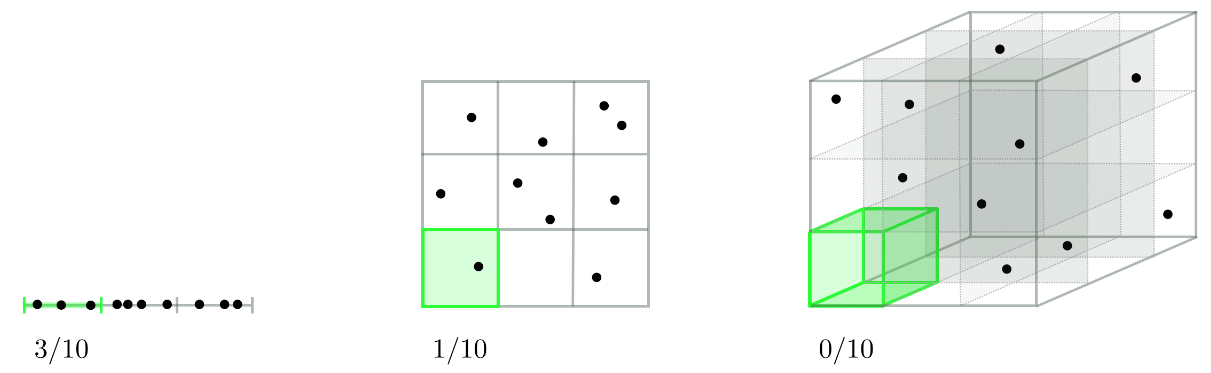

즉 데이터의 차원이 증가할수록 밀도가 희소해지며, 이는 데이터셋의 대부분의 **샘플이 서로 멀리 떨어져 있다**는 것을 의미한다.

데이터 포인트들 간의 거리 또한 증가하게 되므로, 이러한 데이터를 이용해 머신러닝 알고리즘을 학습하게 되면 모델이 복잡해지게 된다. 즉 **학습 데이터셋의 차원이 클수록** 머신러닝 모델이 **과대적합될 위험이 커지게 된다.**

이러한 차원의 저주를 해결하기 위한 방법 중 하나는 **데이터의 밀도가 높아질 때까지 학습 데이터셋의 크기를 늘리는 것**이다. 하지만 **데이터셋의 크기에 비해 차원은 기하급수적으로 커지기 때문에 매우 힘든 일**이라고 할 수 있다.

## 8.2 차원 축소를 위한 접근 방법
구체적인 차원 축소 알고리즘들을 알아보기 전에, 먼저 **차원을 감소시키는 2가지 주요한 접근법**인 **투영(projection)과 매니폴드 학습(manifold learning)**을 살펴본다.

### 8.2.1 투영 (projection)
일반적으로 대부분의 실제 데이터셋에서는 모든 데이터의 특성, 즉 차원이 고르게 분포되어 있지 않다.

필기체 숫자 데이터셋인 MNIST를 예로 들면, 어떤 특성은 거의 변화가 없고 또 어떤 특성은 다른 특성들과 서로 연관되어 있다.

이렇듯 학습 데이터셋은 고차원 공간 안에서 저차원 부분 공간에 위치하게 된다. 즉, **고차원의 데이터의 특성 중 일부 특성으로 데이터를 표현할 수 있다**는 말이 된다.


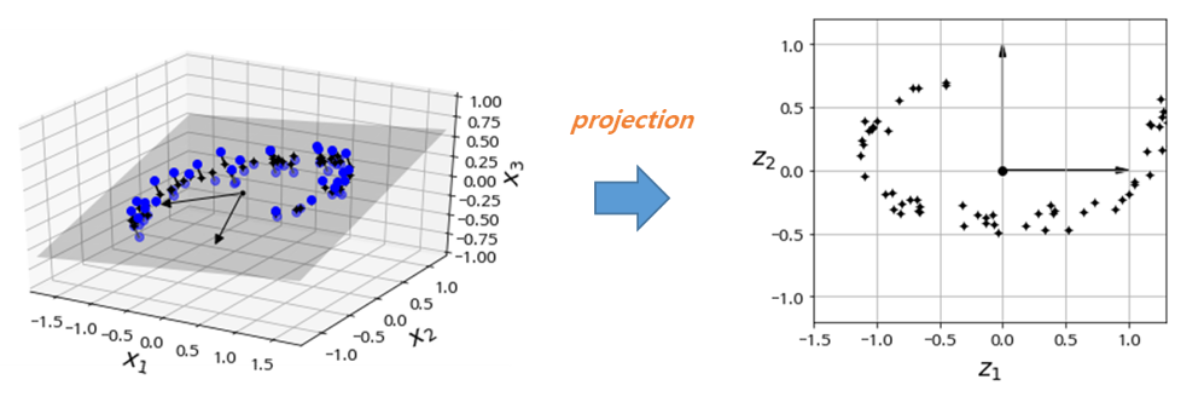

다음의 그림 중 왼쪽 그림은 원모양을 띠는 3차원 데이터셋으로, 이 데이터셋은 모든 훈련 샘플들이 거의 평면 형태로 놓여있다. 이것이 고차원(3D) 공간에 있는 저차원(2D) 부분 공간이다.

오른쪽 그림은 왼쪽의 3차원 공간상의 모든 데이터를 수직으로 2차원 부분 공간에 투영시켜서 2차원 데이터셋으로 만든 것이다.

이렇게 하면 데이터셋의 차원을 3D에서 2D로 줄이게 되며, 각 축은 평면에 투영된 좌표인 새로운 특성 $z_1$과 $z_2$에 대응된다.

### 8.2.2 매니폴드 학습 (manifold learning)
아래 그림은 **스위스 롤** 데이터셋이며, **2D 매니폴드**의 한 예시이다. 그림에서 볼 수 있듯이 2D 매니폴드는 고차원(3차원) 공간에서 휘거나 말린 2D 모양이다.

일반적으로 **d차원 매니폴**드는 국소적으로 **d차원 초평면으로 볼 수 있는 n차원 공간의 일부**를 의미한다.(d<n)

스위스 롤은 d=2이고 n=3인, 국소적으로는 2D 평면이지만 3차원으로 말려있는 데이터이다.

많은 경우의 데이터셋이 스위스 롤처럼 부분 공간이 뒤틀리거나 휘어져 있는데, 이러한 경우에는 차원 축소에 있어서 언제나 투영이 최선의 방법인 것은 아니다.

스위스 롤과 같은 데이터셋을 그냥 평면에 투영시키면 2D 왼쪽 그림처럼 스위스 롤의 층이 서로 뭉개져서 좋은 데이터셋을 얻을 수 없다. 우리가 원하는 데이터셋은 2D 오른쪽 그림처럼 스위스 롤을 펼쳐서 얻는 것이다.

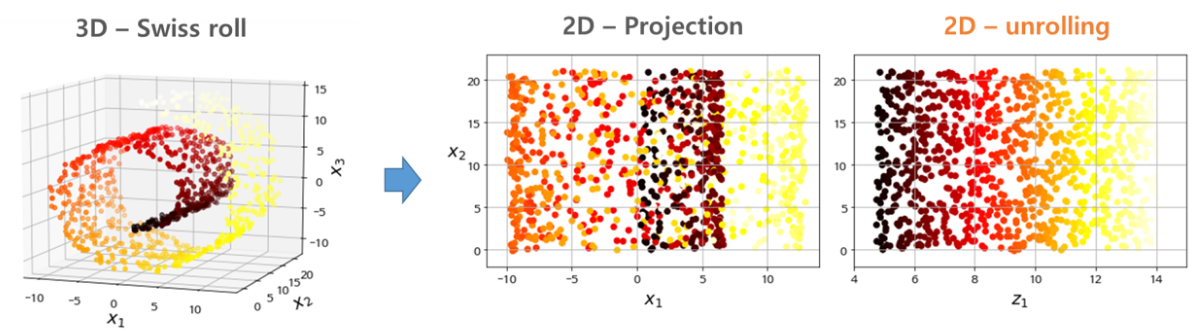

**대부분의 차원 축소 알고리즘이 이러한 매니폴드를 모델링하는 방식으로 동작**하며, 이를 **매니폴드 학습**이라고 한다.

매니폴드 학습은 매니폴드 가정 또는 매니폴드 가설에 의해 **고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정**한다.

매니폴드 가정은 종종 다른 가정과 함께 쓰이기도 한다. 예를 들어 분류나 회귀같은 작업을 하기 전에 **'학습 데이터셋을 저차원의 매니폴드 공간으로 표현하면 더 간단하게 문제를 해결할 수 있다'**라는 가정을 할 수 있다.

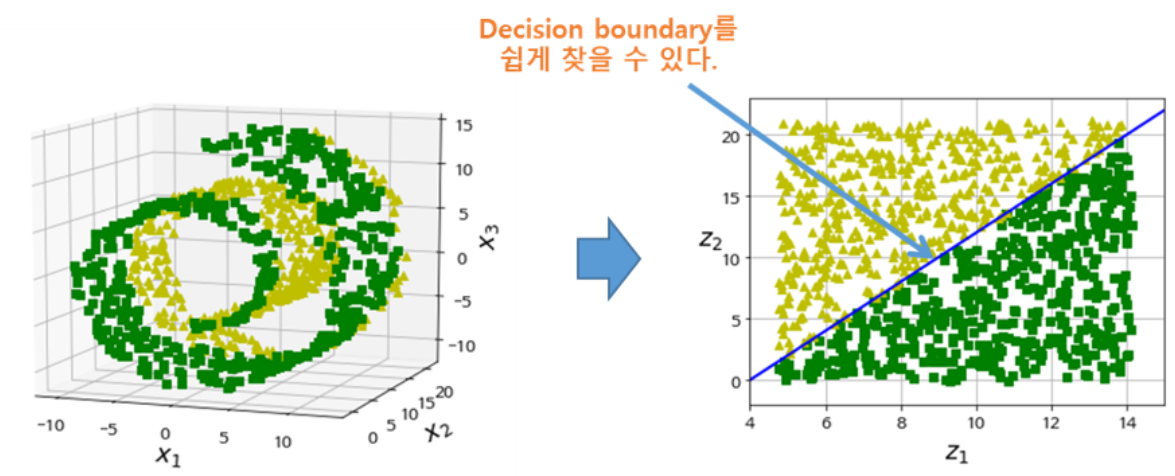

예를 들어 위의 그림처럼 스위스 롤이 2개의 클래스로 나누어져 있다고 가정한다면, 3D인 왼쪽 그림에서는 두 클래스의 결정 경계가 매우 복잡하다.

그러나 펼쳐진 매니폴드 공간인 오른쪽의 2D 그림에서는 두 클래스의 결정 경계가 단순한 직선으로 나타난다.

이러한 경우에는 저차원의 매니폴드 공간에 표현하여 더 간단하게 문제를 해결할 수 있다는 가정이 적절해보인다.

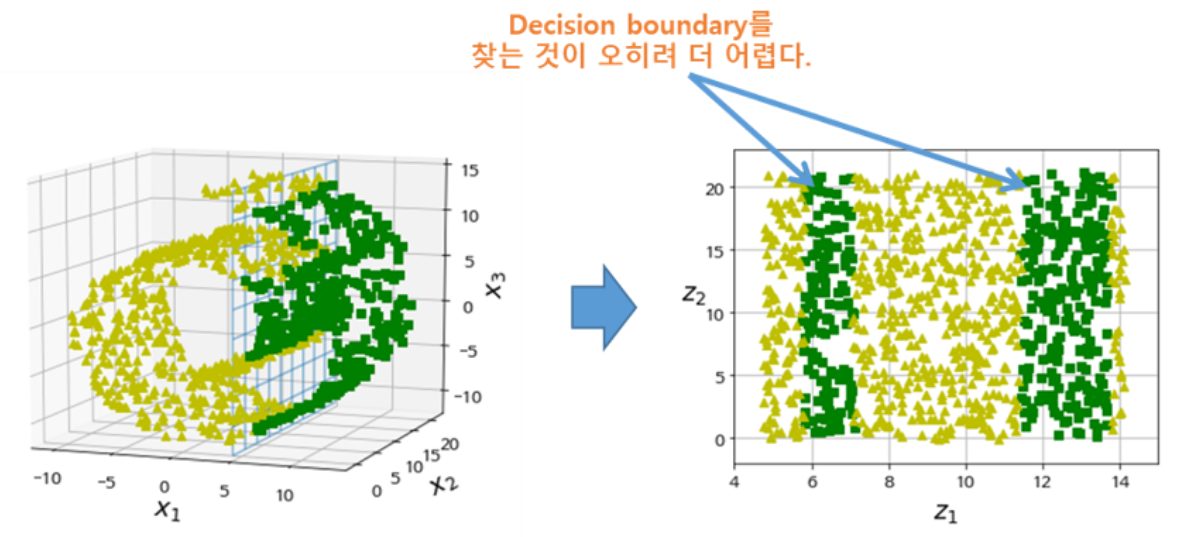

하지만 이러한 암묵적인 가정이 항상 유효하지는 않다.

위의 그림에서 볼 수 있듯이 왼쪽의 3D 공간에서는 $x_1=5$에 결정 경계가 놓여있지만, 오른쪽의 2D 그림에서는 결정 경계가 4개의 독립된 수직선으로 나타나 더 복잡해진 것을 볼 수 있다. 즉 저차원 매니폴드에서 오히려 결정 경계를 찾는 것이 더 어려워지게 된다.

즉 모델을 학습시키기 전에 훈련 세트의 차원을 감소시키면 학습 속도는 빨라지게 되지만, 항상 더 낫거나 간단한 해결책이 되는 것은 아니며 이는 전적으로 데이터셋에 달려 있다.

## 8.3 주성분 분석 (PCA)
**주성분 분석**(PCA, Principal Component Analysis)은 가장 대표적인 차원 축소 알고리즘이다.

PCA는 먼저 **데이터에 가장 가까운 초평면(hyperplane)**을 구한 다음, **데이터를 이 초평면에 투영**시킨다.

### 8.3.1 분산 보존
저차원의 초평면에 데이터를 투영하기 전에 먼저 적절한 초평면을 선택해야 한다.

PCA는 **데이터의 분산이 최대가 되는 축**을 찾는다. **분산이 최대로 보존되는 축**을 선택하는 것이 **정보가 가장 적게 손실**되므로 가장 합리적인 축으로 보인다.

즉 **원본 데이터셋과 투영된 데이터셋 간의 평균 제곱 거리를 최소화 하는 축**을 찾는 것과 동일하다.

아래의 오른쪽 그림은 왼쪽의 2차원 데이터이 각 축에 투영된 결과이다. 실선에 투영된 것은 분산을 최대로 보존하는 반면, 점선과 파선에 투영된 것은 분산을 매우 적게 유지하고 있다. 즉 **$c_1$축으로 투영한 데이터가 분산이 최대로 보존**되는 것을 확인할 수 있다.

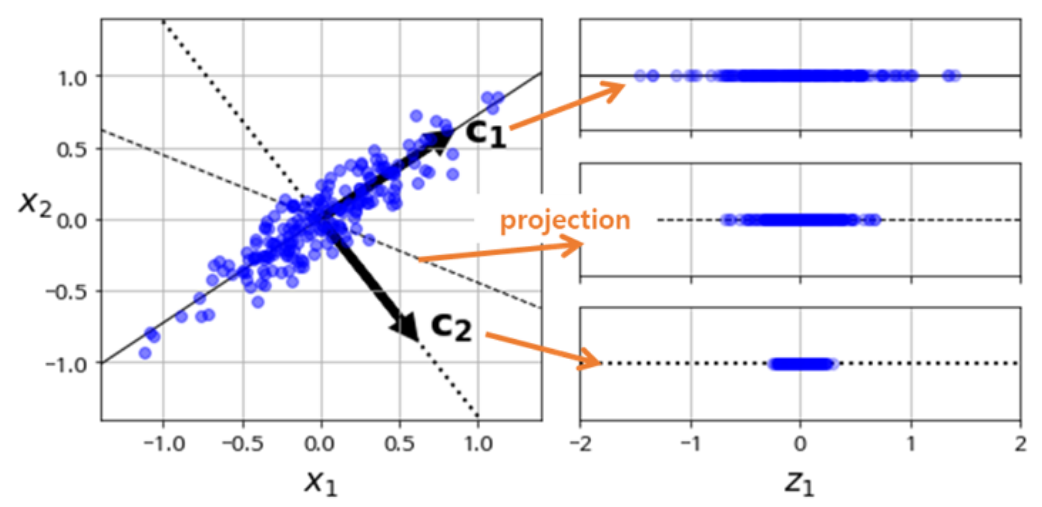

### 8.3.2 주성분
PCA는 다음과 같은 단계로 이루어진다.
1. 학습 데이터셋에서 분산이 최대인 축을 찾는다.
2. 이렇게 찾은 첫번째 축과 직교하면서 분산이 최대인 두번째 축을 찾는다.
3. 첫번째 축과 두번째 축에 직교하고 분산을 최대한 보존하는 세번째 축을 찾는다.
4. 1~3과 같은 방법으로 데이터셋의 차원(특성) 갯수만큼의 축을 찾는다.

**$i$번째 축**을 이 데이터의 **$i$번째 주성분**(principal component)이라고 부른다.

예를 들어 위의 그림에서는 2차원 데이터셋이므로, PCA는 분산을 최대로 보존하는 단위 벡터 $c_1$이 구성하는 축과 이 축에 직교하는 $c_2$가 구성하는 축을 찾게 된다.

훈련 세트의 **주성분은 특이값 분해**(SVD)라는 표준 행렬 분해 기술을 사용하여 구할 수 있다.

데이터셋 $𝐗$에 대한 SVD는 다음과 같이 나타낼 수 있다.

$𝐗=𝐔∑𝐕^T$

- $𝐔$: $m\times m$ 직교행렬 → $𝐗𝐗^T$의 eigenvector
- $𝐕$: $n\times n$ 직교행렬 → PCA의 주성분행렬, $𝐗^T𝐗$의 eigenvector
- $∑$: $m\times n$ 대각행렬 → $𝐗𝐗^T$ 또는 $𝐗^T𝐗$의 eigenvalue의 제곱근을 대각원소로 하는 행렬

SVD를 이용하면 훈련 세트 행렬 $𝐗$를 3개의 행렬 곱셈인 $∑𝐕^T$로 분해할 수 있다. 이때 찾고자 하는 모든 주성분의 단위 벡터들이 주성분 행렬 $𝐕$에 담겨져 있다.

> ***주성분 행렬***

$𝐕 = \begin{pmatrix} | \\c_1 &c_2 ⋯ &c_n \\ |\end{pmatrix}$

**`np.linalg.svd()` 함수를 이용하면 특이값 분해를 수행**할 수 있으며, 세번째 결과값으로 반환되는 것이 주성분 행렬이 된다.

이 주성분 행렬의 첫번째 열이 첫번째 주성분의 단위 벡터가 되는 것이다.

### 8.3.3 d차원으로 투영하기
주성분을 모두 추출해냈다면 처음 $d$개의 주성분으로 정의한 초평면에 투영하여 $n$차원 데이터셋의 차원을 $d$차원으로 축소시킬 수 있다. 이 초평면은 분산을 가능한 최대로 보존하는 투영임을 보장한다.

초평면에 훈련 데이터셋을 투영하고 $d$차원으로 축소된 데이터셋 $𝐗_d$을 얻기 위해서는 원래의 행렬 $𝐗$와 주성분 행렬 $𝐕$의 첫번째 열부터 $d$열까지로 구성된 행렬 $𝐖_d$를 행렬 곱셈하면 된다.

> ***훈련 데이터셋을 d차원으로 투영하기***

$𝐗_d=𝐗𝐖_d$


### 8.3.4 사이킷런에서 주성분 분석 사용하기
사이킷런의 PCA 모델은 앞에서 말한 것처럼 데이터셋에 대한 특이값 분해(SVD)를 이용하여 계산한다.

다음의 예제는 `PCA` 모델을 사용하여 랜덤하게 생성된 3차원의 데이터셋을 주성분 분석하여 single value와 single vector를 구하는 과정을 나타낸 것이다.

In [ ]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


먼저 비교를 위해 특이값 분해(SVD)를 이용하여 주성분 분석을 수행한다.

SVD는 X 데이터셋을 평균을 0이 되도록 변환한 X_cen의 singular value와 singular vector를 계산한다.

앞서 말했듯이 `np.linalg.svd()`를 이용하면 SVD에 필요한 각 행렬들을 구할 수 있다.

In [ ]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로

U, D, V_t = np.linalg.svd(X_cen)
print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


사이킷런에서는 **`PCA`**를 이용하여 간단하게 주성분 분석을 수행할 수 있다. `PCA`는 자동으로 데이터를 중앙에 맞추기 위해 편차 또한 자동으로 처리해 계산해준다.

`PCA` 변환기를 데이터셋에 학습시키면 모델의 `components_` 속성을 사용하여 $d$개의 주성분으로 구성된 $𝐖_d$의 전치행렬을 확인할 수 있다. 즉 주성분 행렬을 확인하기 위해서는 `components_`로 구한 행렬에 transpose를 취해야 한다.

아래의 결과에서 singular vector 즉 주성분 행렬을 보면 위의 결과와 부호(-)가 다른 것을 확인할 수 있다. 이는 벡터의 방향만 반대일 뿐이고 주성분 벡터가 구성하는 축은 동일하다.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


사이킷런의 `PCA`를 이용하여 데이터셋의 차원을 축소하기 위해서는 `fit_transform()` 메서드를 적용하면 된다.

In [ ]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

### 8.3.5 설명된 분산의 비율
**설명된 분산의 비율**(Explained Variance Ratio)은 **각각의 주성분 벡터가 이루는 축에 투영한 결과의 분산의 비율**을 말하며, 각 eigenvalue의 비율과 같은 의미이다.

사이킷런의 `PCA`에서는 **`explained_variance_ratio_`를 이용하여 간단하게 각각의 주성분으로 설명된 분산의 비율**을 구할 수 있다.

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839, 0.01119554])

위의 결과의 의미는 원래 데이터셋 분산의 84.2%가 첫번째 주성분 축에 놓여 있고, 14.6%가 두번째 주성분 축에 놓여 있다는 것을 말한다. 그리고 세번째 주성분 축에는 1.1% 정도로 매우 적은 양의 정보가 들어 있다는 것을 알 수 있다.

따라서 첫번째 주성분과 두번째 주성분을 이용해 3차원의 데이터셋 X를 2차원으로 투영할 경우 원래 데이터셋의 분산에서 1.1%를 잃게 된다.

### 8.3.6 적절한 차원 수 선택하기
원래 데이터를 축소할 적절한 차원 수를 선택하기 위해서는 임의로 정하는 것보다 **누적된 분산의 비율이 95% 정도의 충분한 분산**이 될 때까지 **더해야하는 차원의 개수를 선택**할 수 있다.

`explained_variance_ratio_`를 이용하여 각 주성분으로 설명된 분산의 비율을 확인하고, 이 분산의 비율이 95%를 유지하는데 필요한 최소한의 차원의 수를 계산한다.

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수:', d)

선택할 차원 수: 2


사이킷런의 `PCA`에서는 매개변수 **`n_components`에 0 ~ 1 사이의 유지하려는 분산의 비율 값을 지정**하여 주성분 분석을 할 수 있다.

아래의 코드는 위와 동일하게 주성분으로 설명되는 분산의 비율이 95%가 되도록 주성분 개수를 선택하여 주성분 행렬을 구한 것이다.

In [ ]:
pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(X)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


적절한 차원의 수를 찾는 또 다른 방법은 **설명된 분산을 차원 수에 대한 함수로 그리는 것**이다.

일반적으로 이 함수의 그래프에는 설명된 분산의 빠른 성장이 멈추는 변곡점이 존재한다. 그때의 **elbow 지점을 차원의 수로 선택**하면 된다.

아래의 그래프는 앞에서 구한 설명된 분산의 누적 비율을 나타낸 것으로, x축의 값에서 1씩 더한 것의 주성분 개수가 된다.

설명되는 분산의 비율이 적어도 95%가 되도록 하는 차원의 수를 선택하기로 하였으므로 그래프에서 95% 이상이 되는 지점을 확인한다. 차원의 수는 자연수여야 하므로 x축의 값이 적어도 1보다 크면 되므로 최적의 차원 수는 1을 더한 2가 된다. 따라서 주성분은 2개가 적절하다.

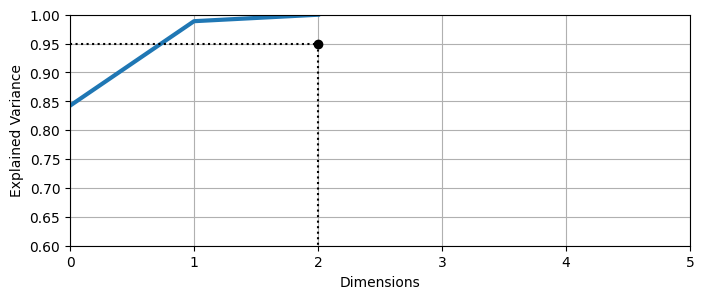

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.plot(cumsum, linewidth=3)                                # 설명 분산 비율 그래프(파랑색 곡선)

plt.axis([0, 5, 0.6, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.plot(d, 0.95, "ko")                                     # (최적의 차원 수, 95) 좌표의 점
plt.plot([d, d], [0, 0.95], "k:")                           # 수직 점선
plt.plot([0, d], [0.95, 0.95], "k:")                        # 수평 점선
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),      # Elbow 주석
             arrowprops=dict(arrowstyle="->"), fontsize=16)

plt.grid(True)
plt.show()

### 8.3.7 압축을 위한 PCA
데이터셋의 **차원을 축소**하게 되면 데이터셋의 크기가 줄어든다.
**굵은 텍스트**
다음의 예제는 MNIST 데이터셋에 주성분 분석을 수행하여 분산의 95%만 유지하도록 하기 위해 `PCA` 알고리즘을 적용한 것이다.

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28)

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)  # PCA 계산 후 투영

In [ ]:
print('선택한 차원(픽셀) 수:', pca.n_components_)

선택한 차원(픽셀) 수: 154


PCA 적용결과 총 784 차원에서 154 차원으로 약 80% 정도의 차원이 축소되어, 대부분의 분산은 유지되었지만 크기는 원본 크기의 20% 미만이 되는 것을 확인할 수 있다.

이렇게 **압축한 데이터셋을** 이용해 SVM과 같은 분류 알고리즘을 학습 시킬 경우 **학습 속도를 빠르게** 할 수 있다.

또한 압축된 데이터셋에 **PCA 투영 변환을 반대로 적용**하여 **다시 원래 데이터의 차원으로 복원**할 수 있다. 위에서 5% 만큼의 정보(분산)를 잃었기 때문에 완벽하게 복원은 할 수 없지만, 원본 데이터와 비슷하게 복원할 수 있다.

**원본 데이터와 압축 후 다시 복원한 재구성 데이터간의 평균 제곱 거리**를 **재구성 오차**(reconstruction error)라고 한다. 압축 후 복원하는 과정을 식으로 나타내면 다음과 같다.

$𝐗_{recovered}=𝐗𝐕_d^T$
- $𝐗_d=𝐗𝐕_d$
- $𝐕_d$: orthogonal matrix $→ 𝐕_d𝐕_d^T=𝐈$

압축 후 복원된 재구성 데이터를 만들기 위해서는 `inverse_transform()` 메서드를 사용하면 된다.

아래의 코드는 `PCA` 알고리즘을 이용하여 X_train을 위의 예제에서 구한 적절한 차원 수인 154 차원으로 압축하고, 다시 `inverse_transform()` 메서드를 이용해 원래의 784 차원으로 복원하는 코드이다.

In [ ]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train) # 압축
X_reduced.shape

(60000, 154)

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

In [ ]:
import matplotlib
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

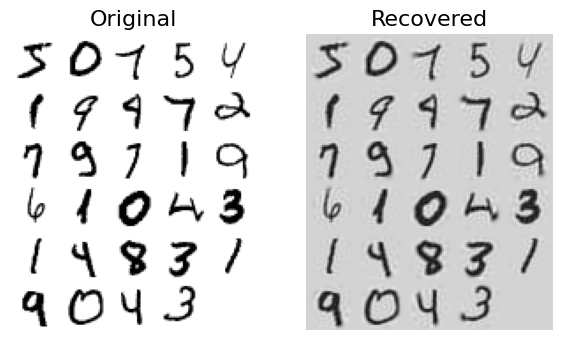

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovered", fontsize=16)
plot_digits(X_recovered[::2100])

위의 왼쪽 그림은 원본 데이터셋이고, 오른쪽 그림은 샘플을 154 차원으로 압축한 후에 다시 원래의 784 차원으로 복원한 데이터셋이다.

이미지의 품질이 조금 손실되기는 했지만 숫자 모양은 거의 온전하므로 잘 복원되었다고 볼 수 있다.

### 8.3.8 랜덤 PCA
`PCA`의 매개변수를 `svd_solver='randomized'`로 지정하면 사이킷런은 랜덤 PCA라고 부르는 **확률적 알고리즘**을 사용해서 **처음 $d$개의 주성분에 대한 근삿값**을 빠르게 찾는다.

이 알고리즘의 계산 복잡도는 $O(m\times d^2)+O(d^3)$으로, **$d$가 $n$보다 많이 작으면** 계산 복잡도로 $O(m\times n^2)+O(n^3)$을 사용하는 **완전한 SVD 방식보다 훨씬 빠르다.**

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_rnd_reduced = rnd_pca.fit_transform(X_train)
X_rnd_reduced.shape

(60000, 154)

`svd_solver`의 기본값은 `'auto'`이다.

만약 $m$이나 $n$이 500보다 크고, $d$가 $m$이나 $n$의 80%보다 작으면 사이킷런은 자동으로 랜덤 PCA 알고리즘을 사용한다.

그렇지 않으면 완전한 SVD 방식을 사용한다. 완전한 SVD 방식을 사용하도록 강제하려면 `svd_solver='full'`로 지정하면 된다.



### 8.3.9 점진적 PCA
PCA 알고리즘의 단점은 SVD를 수행하기 위해서는 전체 학습 데이터셋을 메모리에 올려야 한다는 것이다. 이러한 단점을 보완하기 위해 **점진적 PCA**(IPCA, Incremental PCA) 알고리즘이 개발되었다.

IPCA는 **학습 데이터셋을 미니배치로 나눈 뒤** IPCA 알고리즘에 **한번에 하나씩의 미니배치를 입력으**로 넣어준다. IPCA는 **학습 데이터셋이 클 때 유용**하다.

사이킷런은 **`IncrementalPCA`**를 통해 점진적 PCA를 사용할 수 있다.

아래의 예제는 MNIST 데이터를 100개의 미니배치로 나눠 점진적 PCA를 수행하는 코드이다.

먼저 넘파이의 `array_split()` 함수를 사용하면 데이터를 100개의 미니배치로 나눌 수 있다. 다음으로 사이킷런의 `IncrementalPCA`를 이용하여 MNIST 데이터셋의 차원을 154개로 줄이도록 학습한다. 이때 전체 훈련 세트에 사용하는 **`fit()` 메서드가 아닌 `partial_fit()` 메서드**를 미니배치마다 호출해야 한다.

각 미니배치마다 학습이 종료되면 전체 훈련 세트를 사용하여 데이터의 차원을 축소한다. 이때 다시 학습하면 안되므로 `transform()` 메서드를 사용해야 한다.

In [ ]:
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=154)

n_batches = 100
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)
X_reduced.shape

(60000, 154)

## 8.4 커널 PCA
이전에 서포트벡터머신(SVM)에서 **커널을 이용하여 데이터를 저차원에서 고차원으로 매핑**시켜 **비선형 데이터셋에 SVM을 적용**시키는 **Kernel SVM**에 대해 알아보았다.

이렇게 같은 기법을 PCA에 적용해 **비선형 투영으로 차원**을 축소할 수 있는데, 이것을 **Kernel PCA**(KPCA)라고 한다.

사이킷런에서는 **`KernelPCA`**를 이용하여 Kernel PCA를 적용할 수 있다.

아래의 코드는 앞서 살펴본 스위스 롤 데이터셋에 대하여 `KernelPCA`를 이용하여 2차원으로 축소하는 예제이다. 이때 `kernel` 인자에 여러가지 커널 종류를 지정하여 다양한 방법으로 축소할 수 있다.

아래의 그림은 순서대로 단순한 PCA와 동일한 선형(`linear`) 커널, RBF(`rbf`) 커널, 시그모이드(`sigmoid`) 커널을 사용하여 2차원으로 축소시킨 스위스 롤의 모습을 나타낸다.

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

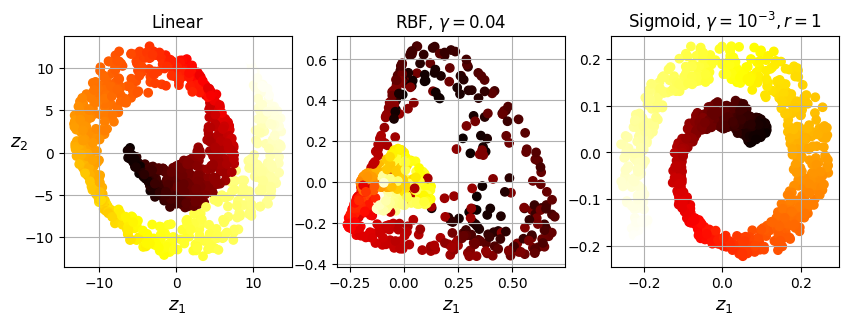

In [ ]:
plt.figure(figsize=(10,3))
for subplot, pca, title in ((131,lin_pca,"Linear"), (132,rbf_pca,"RBF, $\gamma=0.04$"), (133,sig_pca,"Sigmoid, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=12)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=13)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=13, rotation=0)
    plt.grid(True)

plt.show()

### 8.4.1 커널 선택과 하이퍼파라미터 튜닝
**Kernel PCA는 비지도 학습**이므로 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 존재하지 않는다.

하지만 차원 축소는 종종 지도 학습의 전처리 단계로 활용되므로 **그리드 탐색**을 사용하면 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

다음 코드는 두 단계의 파이프라인을 만든다. 먼저 `KernelPCA`를 사용하여 2차원으로 차원을 축소하고, 분류를 위해 로지스틱 회귀를 적용한다. 그 다음 파이프라인의 마지막 단계에서 가장 높은 분류 정확도를 얻기 위해 `GridSearchCV`를 사용하여 `KernelPCA`의 가장 좋은 커널과 `gamma` 파라미터를 찾는다.

이렇게 선택된 두 하이퍼파라미터의 최적 결과는 `GridSearchCV` 모델에 `best_params_` 변수를 이용하여 확인할 수 있다.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('logistic_reg', LogisticRegression())
])
param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf','sigmoid']
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('logistic_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

## 8.5 지역 선형 임베딩 (LLE)
**지역 선형 임베딩**(LLE, Locally Linear Embedding)은 강력한 **비선형 차원 축소 기법**이다. 앞서 살펴본 PCA와 달리 투영에 의존하지 않는 **매니폴드 학습**이다.

LLE는 머신러닝 알고리즘 중 비지도학습에 해당하며, **서로 인접한 데이터들을 보존**하면서 **고차원인 데이터셋을 저차원으로 축소**하는 방법이다.

간단히 말하자면 LLE는 먼저 각 훈련 **샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정**한다. 그 다음 국부적인 **관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다**.

이 방법은 특히 잡음이 너무 많지 않은 경우에 꼬인 매니폴드를 펼치는데 잘 작동한다.

사이킷런의 **`LocallyLinearEmbedding`**을 사용하여 LLE 알고리즘을 구현할 수 있다.

다음의 코드는 아래의 예제는 스위스롤 예제 데이터를 LLE를 이용해 차원 축소하는 코드이다.

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

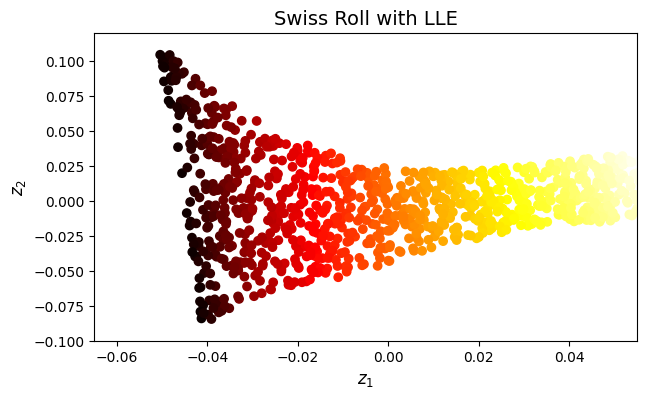

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Swiss Roll with LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=12)
plt.ylabel("$z_2$", fontsize=12)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.show()

위의 그림은 3차원인 스위스 롤 데이터셋을 2차원으로 축소하여 2D 데이터셋으로 나타낸 것이다. 그림에서 볼 수 있듯이 스위스 롤이 완전히 펼쳐졌고, 지역적으로는 샘플 간의 거리가 잘 보존되어 있다.

그러나 전체적으로 보면 오른쪽은 잘 압축되어 있는 반면 왼쪽으로 갈수록 샘플들 간의 거리가 확장되어 있다.

그럼에도 불구하고 LLE는 매니폴드를 모델링하는데 잘 동작한다고 볼 수 있다.

사이킷런이 제공하는 LLE 알고리즘의 계산 복잡도에는 다음과 같은 복잡도가 고려된다.
- $k$개의 최근접 이웃 찾기: $O(m\log(m)n\log(k))$
- 가중치 최적화: $O(mnk^3)$
- 저차원 표현 만들기: $O(dm^2)$

불행하게도 마지막 항의 $m^2$로 인해 LLE 알고리즘은 대량의 데이터셋에 적용하기 어렵다.

LLE가 작동하는 방식은 다음과 같다.

**첫번째 단계는 선형적인 지역 관계를 모델링**한다.
- 먼저 알고리즘이 각 훈련 샘플 $𝐱^{(i)}$에 대해 가장 가까운 $k$개의 샘플을 찾고, 이 샘플들이 이웃이 된다.
- 그 다음 이웃들에 대한 선형 함수로 $𝐱^{(i)}$를 재구성한다. $𝐱^{(i)}$와 $\displaystyle\sum_{j=1}^m w_{i,j}𝐱^{(i)}$ 사이의 제곱 거리가 최소가 되는 $w_{i,j}$를 찾는 것이다.
- 이때 $𝐱^{(j)}$가 $𝐱^{(i)}$의 가장 가까운 $k$개의 이웃 중 하나가 아닐 경우에는 $w_{i,j}=0$이다.
- 그러므로 LLE의 첫번째 단계는 2가지의 제한이 있는 최적화 문제가 된다.
- 나머지 두번째 제약은 각 훈련 샘플 $𝐱^{(i)}$에 대한 가중치를 단순히 정규화하는 것이다.

> ***LLE 단계 1: 선형적인 지역 관계 모델링***

$𝐖:$ 가중치 $w_{i,j}$를 모두 담은 가중치 행렬이라고 할 때,

$\hat{𝐖}= \arg\min_w \displaystyle\sum_{i=1}^m(𝐱^{(i)}-\sum_{j=1}^m w_{i,j}𝐱^{(j)})^2$

[조건] $\begin{cases} w_{i,j}=0, &\text {$𝐱^{(j)}$가 $𝐱^{(i)}$의 $k$개의 최근접 이웃 중 하나가 아닐 때} \\
\displaystyle\sum_{j=1}^m w_{i,j}=1, &\text {$i=1,2,⋯,m$일 때} \end{cases}$





첫번째 단계를 거치면 가중치 행렬 $\hat{𝐖}$은 훈련 샘플 사이에 있는 지역 선형 관계를 담고 있다.

**두번째 단계**는 가능한 이 **관계가 보존되도록 훈련 샘플을 $d$차원 공간으로 매핑**한다. $(d<n)$
- 만약 $𝐳^{(i)}$가 $d$차원 공간에서 $𝐱^{(i)}$의 상(이미지)이라면 가능한 $𝐳^{(i)}$와 $\displaystyle\sum_{j=1}^m\hat{w}_{i,j}𝐳^{(j)}$ 사이의 거리가 최소화되어야 한다.
- 이것으로 인해 아래의 식과 같은 제약이 없는 최적화 문제로 바꾸어준다.
- 첫번째 단계와는 반대로 가중치를 고정하고 저차원의 공간에서 샘플 이미지의 최적 위치를 찾는다.

>  ***LLE 단계 2: 관계를 보존하는 차원 축소***

$𝚭:$ 모든 $𝐳_{i,j}$를 포함하는 행렬이라고 할 때,

$𝚭= \arg\min_𝐳 \displaystyle\sum_{i=1}^m(𝐳^{(i)}-\sum_{j=1}^m \hat{w}_{i,j}𝐳^{(j)})^2$


## 8.6 다른 차원 축소 기법
위에서 살펴본 PCA, LLE 차원 축소 알고리즘 외에 MDS, IsoMap, t-SNE, LDA 등 다양한 차원 축소 알고리즘들이 있다.

#### **랜덤 투영 (Random Projection)**
- **랜덤한 선형 투영**을 사용해서 **데이터를 저차원 공간으로 투영**한다.
- 차원 축소 품질이 샘플 수와 목표 차원 수에 따라 다르다

#### **다차원 스케일링 (MDS)**
- **샘플 간의 거리를 보존**하면서 차원을 축소한다.

#### **Isomap**
- **각 샘플을 가장 가까운 이웃과 연결**하는 식으로 그래프를 만든다.
- 그 다음 **샘플 간의 지오데식 거리를 유지**하면서 차원을 축소한다.

#### **t-SNE**
- **비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록** 하면서 차원을 축소한다.
- 주로 **시각화**에 많이 사용되며, 특히 **고차원 공간에 있는 샘플의 군집을 시각화**할 때 사용한다.

#### **선형 판별 분석 (LDA)**
- 사실 분류 알고리즘이지만, **학습 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습**한다.
- 이 축은 데이터가 투영되는 **초평면을 정의하는데 사용**할 수 있다.
- 투영을 통해 **가능한 클래스를 멀리 떨어지게 유지**시키므로, SVM 분류기 같은 **다른 분류 알고리즘을 적용하기 전에 차원을 축소하기 좋다**는 장점이 있다.

아래의 코드는 사이킷런을 이용해 MDS, Isomap, t-SNE를 구현하여 스위스 롤 데이터셋을 2차원으로 표현하는 예제이다.

사이킷런의 `manifold` 클래스에서 제공하는 MDS를 위한 **`MDS`**를, Isomap을 위한 **`Isomap`**을, t-SNE를 위한 **`TSNE`**를 사용하여 각 알고리즘을 구현할 수 있다.

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import MDS, Isomap, TSNE
# MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

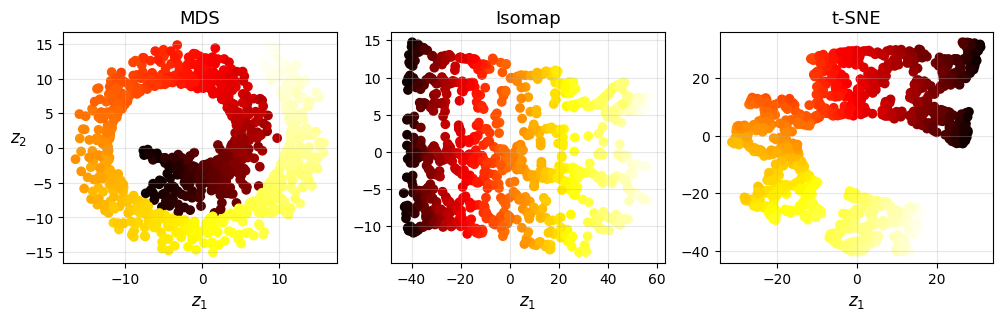

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(12,3))
for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.grid(True, alpha=0.3)
    plt.title(title, fontsize=13)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=12)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=12, rotation=0)

plt.show()